**MOD 5: FINAL PROJECT**

# <font color='#d39aed'> 👾**Symptoms and Presence of COVID  (05/2020 data)**👾


###Project expectations:


In this final project, you can expect to see the following:

*   **Dataset:** Source: https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence
*
  **The following steps:**
1.   **Description of the data:** A short description of the data and link to the dataset.
2.   **Loading data:** Comments explaining what the code is doing.
3.   **Summarize and analyze the data:** Used examples in Module 4
4.   **Data preprocessing:** Used examples in Module 4
5.   **Apply the ML model:** One or two machine learning models that we learned in this course. Extra credit if applying a new machine learning that you learned based on solo research.
6.   **Evaluate the performance** using the metrics learned according to the ML model used.
7.   **Model result comparison:** If applying two ML models to the dataset, compare their accuracies. If using Kaggle and other people worked in the same datasets, compare their results to the results that you obtained.
8.   **Conclusion:** A short conclusion and the accuracy obtained.


## **STEP 1: Data Description**

The data within is based on May 2020 data based on WHO guidelines. Based on the date of this dataset, we can conclude data is limited to the Delta (B. 1.617. 2) Variant. While this should not be used for any medical purposes, the intent is to predict the probability of Covid based on symptoms.

This data is not conclusive and symptoms vary with each variant.

This data set is from https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence.



We will work with Covid 2020 data.

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **STEP 2: Loading data**

In [ ]:
#Load the dataset
df = pd.read_csv('/content/Covid Dataset.csv')

In [ ]:
#Display the dataset
df


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
#Show a portion of the data
df.head(5)


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
#Show the null values in the data frame
df.isnull().sum()


,0
Breathing Problem,0
Fever,0
Dry Cough,0
Sore throat,0
Running Nose,0
Asthma,0
Chronic Lung Disease,0
Headache,0
Heart Disease,0
Diabetes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
df.shape

(5434, 21)

## **STEP 3: Summarize and analyze the data**

Column 20, COVID-19, is the diagnosis column - Yes is Positive for Covid 19 and No is Negative.

Columns 0 through 12 are symptoms and conditions.
Columns 13 throuh 19 are Actions taken or Exposure points.

In [ ]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


## **STEP 4: Data preprocessing**

While the correlation between exposures and or measures taken and rate of positive Covid 19 results is intriguing, I am removing those columns for this current analysis as we are focusing only on symptoms as indicators.

In [ ]:
#Drop the unnecessary variables for the analysis
df.drop('Abroad travel', axis=1, inplace=True)
df.drop('Contact with COVID Patient', axis=1, inplace=True)
df.drop('Attended Large Gathering', axis=1, inplace=True)
df.drop('Visited Public Exposed Places', axis=1, inplace=True)
df.drop('Family working in Public Exposed Places', axis=1, inplace=True)
df.drop('Wearing Masks', axis=1, inplace=True)
df.drop('Sanitization from Market', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'COVID-19'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Sore throat':'Sore Throat',
                        'Running Nose':'Runny Nose',
                        'Hyper Tension':'Hypertension',
                        'Breathing Problem':'Breathing Problems',
                        'COVID-19' : 'COVID19'})

In [ ]:
#Find the new shape
df.shape

(5434, 14)

In [ ]:
from enum import unique
df.COVID19.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Breathing Problems    5434 non-null   object
 1   Fever                 5434 non-null   object
 2   Dry Cough             5434 non-null   object
 3   Sore Throat           5434 non-null   object
 4   Runny Nose            5434 non-null   object
 5   Asthma                5434 non-null   object
 6   Chronic Lung Disease  5434 non-null   object
 7   Headache              5434 non-null   object
 8   Heart Disease         5434 non-null   object
 9   Diabetes              5434 non-null   object
 10  Hypertension          5434 non-null   object
 11  Fatigue               5434 non-null   object
 12  Gastrointestinal      5434 non-null   object
 13  COVID19               5434 non-null   object
dtypes: object(14)
memory usage: 594.5+ KB


In [ ]:
#Get info of the data
df.head()

,Breathing Problems,Fever,Dry Cough,Sore Throat,Runny Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hypertension,Fatigue,Gastrointestinal,COVID19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


Replacing Yes with 1 and No with 0 to better determine positive and negative results.

In [ ]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipython-input-2083555711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Breathing Problems    5434 non-null   int64
 1   Fever                 5434 non-null   int64
 2   Dry Cough             5434 non-null   int64
 3   Sore Throat           5434 non-null   int64
 4   Runny Nose            5434 non-null   int64
 5   Asthma                5434 non-null   int64
 6   Chronic Lung Disease  5434 non-null   int64
 7   Headache              5434 non-null   int64
 8   Heart Disease         5434 non-null   int64
 9   Diabetes              5434 non-null   int64
 10  Hypertension          5434 non-null   int64
 11  Fatigue               5434 non-null   int64
 12  Gastrointestinal      5434 non-null   int64
 13  COVID19               5434 non-null   int64
dtypes: int64(14)
memory usage: 594.5 KB


In [ ]:
df['COVID19'].value_counts()

,count
COVID19,
1,4383
0,1051


###**Visualize the data**

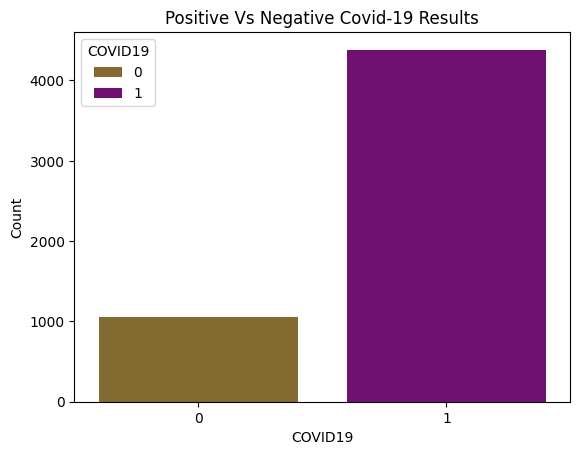

In [ ]:
sn.countplot(x='COVID19', data=df, hue= 'COVID19', palette=['#90702294','#80008080'])
plt.title("Positive Vs Negative Covid-19 Results")
plt.ylabel('Count')
plt.show()

Common Symptoms:

In [ ]:
symptoms = df.drop('COVID19', axis=1)
symptom_sums = symptoms.sum().sort_values(ascending=False)

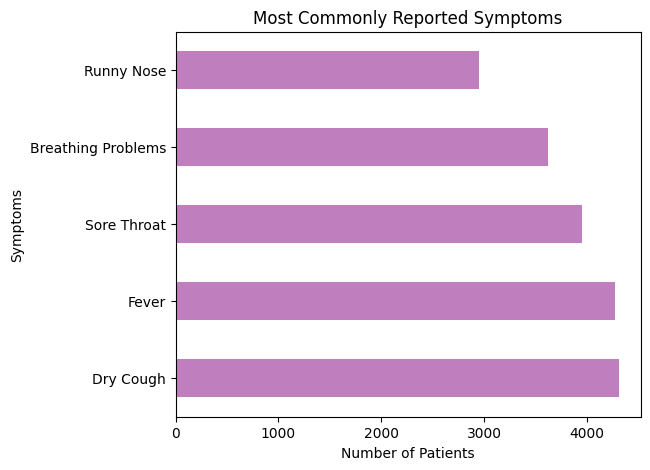

In [ ]:
top_n_symptoms = symptom_sums.nlargest(n=5)

# Plot the top N
top_n_symptoms.plot(kind='barh', figsize=(6, 5), color='#80008080')
plt.title("Most Commonly Reported Symptoms")
plt.xlabel('Number of Patients')
plt.ylabel('Symptoms')
plt.show()

In [ ]:
c_positive = df[df['COVID19'] == 1].mean()*100
c_negative = df[df['COVID19'] == 0].mean()*100

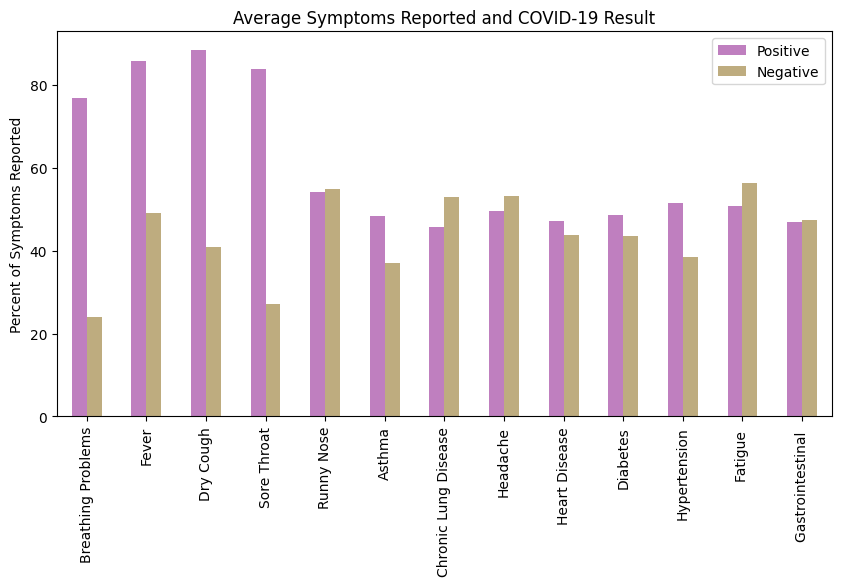

In [ ]:
compare = pd.DataFrame({'Positive': c_positive, 'Negative': c_negative})
compare.drop('COVID19', errors='ignore', inplace=True)
compare.plot(kind='bar', figsize=(10,5), color=('#80008080','#90702294'))
plt.title("Average Symptoms Reported and COVID-19 Result")
plt.ylabel('Percent of Symptoms Reported')
plt.show()

## **STEP 5: Apply the ML models**

In [ ]:
#split data
X = df.drop('COVID19', axis=1).values
y = df['COVID19'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [ ]:
#shape of training and test data:
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)

The shape of X_train is  (3803, 13)
The shape of X_test is  (1631, 13)
The shape of y_train is  (3803,)
The shape of y_test is  (1631,)


###### Build Models

####Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier(random_state=48)
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

####Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=48)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

## **STEP 6: Evaluate the model performance**

In [ ]:
#find the confusion matrix
cmD = confusion_matrix(y_test, y_pred_rf)

print("The Deciscion Tree Confusion Matrix is: ")
print(cmD)


cmR = confusion_matrix(y_test, y_pred_dt)

print("The Random Forest Confusion Matrix is: ")
print(cmR)

The Deciscion Tree Confusion Matrix is: 
[[ 293   18]
 [  18 1302]]
The Random Forest Confusion Matrix is: 
[[ 297   14]
 [  19 1301]]


In [ ]:
test_report_D = classification_report(y_test, y_pred_dt)
test_report_R = classification_report(y_test, y_pred_rf)

print(test_report_D)
print(test_report_R)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       311
           1       0.99      0.99      0.99      1320

    accuracy                           0.98      1631
   macro avg       0.96      0.97      0.97      1631
weighted avg       0.98      0.98      0.98      1631

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       311
           1       0.99      0.99      0.99      1320

    accuracy                           0.98      1631
   macro avg       0.96      0.96      0.96      1631
weighted avg       0.98      0.98      0.98      1631



## **STEP 7: Model result comparison**

Both models show 98% accuracy!
Only Recall and F1-Score varied between the models, at about 1%

## **STEP 8: Conclusion**

Exploring the original source's discussion and other pages that have used this same dataset on Kaggle, most who have used this dataset report 97-98% accuracy depending on the model used; 97% was for a Linear Regression model. Each had different approaches, difficulty level, and goals. It was interesting to explore and find that we all have come to similar conculsions:  

###98%!

Being able to predict the probability of symptoms ensures quicker support for early isolation and treatment, and helps when resources are limited.